In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/customer_support.csv")

In [ ]:
data.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN


Seperate out rows where language equal to english

In [ ]:
data_en = data.loc[data["language"].eq("en"),:]
data_en.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN


In [ ]:
# subject and body
tickets = data_en.loc[:, ["subject", "body"]].apply(lambda x: f"subject: {x['subject']} \n\n\n Body: {x['body']}", axis=1)


In [ ]:
# subject and answer
ticket_answer = data_en.loc[:,["subject","answer"]].apply(lambda x:f"subject:{x['subject']} \n answer:{x['answer']}",axis=1)


In [ ]:
print(tickets[0])

subject: Urgent: Critical impact on enterprise network connectivity 


 Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company>


In [ ]:
print(ticket_answer[0])

subject:Urgent: Critical impact on enterprise network connectivity 
 answer:Subject: Re: Urgent: Critical impact on enterprise network connectivity


Dear <name>,


Thank you for reaching out to us regarding the critical outage affecting your Cisco Router ISR4331.


We understand the urgency and impact of this issue on your operations. Our technical support team is prioritizing your case and will promptly begin diagnosing the problem to facilitate a quick resolution.


Please ensure all relevant technical logs are available for our team to access, which will assist in expediting the diagnostic process. We will maintain close communication and provide updates as our investigation proceeds.


Your patience and cooperation are greatly appreciated, and we're committed to resolving this matter as swiftly as possible.


Best regards,


Customer Support Team


Removing of Stop words from tickets and apply lammetization to find pca component


In [ ]:
# removing stop words and applying lammetization

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]
    return " ".join(words)

processed_tickets = tickets.apply(preprocess_text)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_tickets)

tfidf_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<339x1936 sparse matrix of type '<class 'numpy.float64'>'
	with 16786 stored elements in Compressed Sparse Row format>

In [ ]:
# PCAs

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

pca_df

,PC1,PC2,PC3
0,-0.130977,0.319513,0.019860
1,-0.151007,-0.151323,0.060708
2,-0.161957,-0.268901,0.073937
3,0.065928,-0.026012,-0.311948
4,0.203023,0.111535,0.009135
...,...,...,...
334,0.240195,0.098517,0.121857
335,0.107337,0.119968,-0.294102
336,-0.210455,0.343947,0.092500
337,-0.150986,-0.226285,0.101616


Combining Tag_1 to Tag_9 and try to find the same combination having tags


In [ ]:
# combine and form token of tags

import pandas as pd

def combine_tags(row):
    tags = []
    for i in range(1, 10):  # Assuming tags are from tag_1 to tag_9
        tag_col = f"tag_{i}"
        if tag_col in row and pd.notna(row[tag_col]):
            tags.append(str(row[tag_col]))
    return " ".join(tags)

data_en['combined_tags'] = data_en.apply(combine_tags, axis=1)

# Calculate value counts for unique strings of combined tags
tag_counts = data_en['combined_tags'].value_counts().reset_index()
tag_counts.columns = ['combined_tags', 'count']

tag_counts

<ipython-input-82-1371f4c4e4a3>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,combined_tags,count
0,Technical Support Product Support IT Support P...,3
1,Technical Support Product Support General Inqu...,2
2,Technical Support Urgent Issue Software Bug Pr...,2
3,Network Issue Technical Support Urgent Issue P...,2
4,Urgent Issue IT Support Service Disruption Inc...,2
...,...,...
327,Product Support Technical Support Warranty Cla...,1
328,IT Support Urgent Issue Network Issue Technica...,1
329,Technical Support Urgent Issue Problem Resolut...,1
330,Technical Support Urgent Issue Software Bug Ac...,1


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def preprocess_and_tokenize_tags(row):
    """Combines and tokenizes tags from tag_1 to tag_4."""
    tag_columns = [f"tag_{i}" for i in range(1, 4)]
    tags = " ".join(str(row[col]) for col in tag_columns if pd.notna(row[col]) and row[col] != '')

    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

    tokens = nltk.word_tokenize(tags.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]  # Keep only alphanumeric tokens

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(sorted(set(tokens)))

data_en['combined_tags'] = data_en.apply(preprocess_and_tokenize_tags, axis=1)
data_en['combined_tags'].value_counts()


<ipython-input-84-1cf58d476687>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
combined_tags,
failure hardware product support technical,19
issue network support technical urgent,18
disruption issue service support technical urgent,17
bug product software support technical,16
bug issue software support technical urgent,12
...,...
exchange product replacement return support technical,1
guidance notification service support technical,1
customer product service support technical,1


scree plot showing no elbow indicating  indicating that all three components contribute somewhat equally


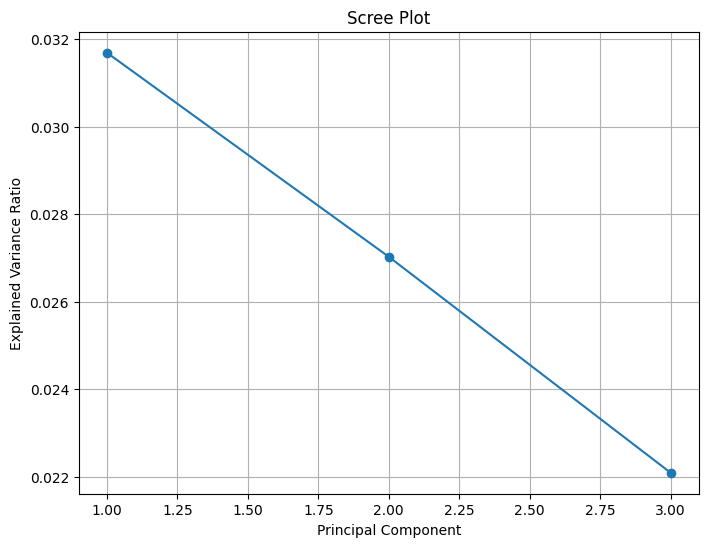

In [ ]:
# PCA variance plot

import matplotlib.pyplot as plt

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

Find the same product issues using pca component


In [ ]:
# plot 3 PCAs for answer column for tag_1
import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=data_en['tag_1'])
fig.show()

Here we got same product and also similar type product issues


In [ ]:
import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=data_en.index)
fig.show()

Jira software issues


In [ ]:
data_en.loc[[92, 140,104], ["subject"]].values

array([['Missing ticket notifications impacting Jira feedback'],
       ['Immediate Fix Needed for Jira Crashes'],
       ['Urgent Update Required for Jira Software 8.20']], dtype=object)

zoom issues


In [ ]:
data_en.loc[[48, 59], ["subject"]].values

array([['Urgent: User unable to join scheduled Zoom meeting'],
       ['Urgent Assistance Needed for Zoom Issues']], dtype=object)

AWS issues


In [ ]:
data_en.loc[[980, 817, 293, 433, 43, 633,879, 874,872,26, 518, 980, 1173, 1512,1314,1340], ["subject"]].values


array([['Urgent Issue with AWS Deployment'],
       ['Immediate Attention Required'],
       ['Urgent Assistance Needed for AWS Access Issue'],
       ['Critical: Significant AWS Service Disruption'],
       ['Urgent AWS Connectivity Issue'],
       ['Urgent: AWS Downtime Issue'],
       ['Urgent Request for AWS Infrastructure Optimization'],
       ['Issue with AWS Billing Charges'],
       ['Request for AWS Infrastructure Scaling Assistance'],
       ['Urgent Care Needed: Issue with AWS Deployment'],
       ['Critical: Problem with AWS Deployment'],
       ['Urgent Issue with AWS Deployment'],
       ['Urgent Assistance Needed: Issue with AWS Deployment'],
       ['Urgent Assistance Required: Issue with AWS Deployment'],
       ['AWS Service Update Request'],
       ['Billing Issue with AWS Management Service']], dtype=object)

cisco  router


In [ ]:
data_en.loc[[1324, 1330, 1343], ["subject"]].values

array([['Immediate Help Required'],
       ['Seeking Assistance: Router Leading to Network Disruptions'],
       ['Immediate Support Required: Cisco ISR4331 Router Outage']],
      dtype=object)

In [ ]:
data_en.loc[[194, 626, 536, 906, 53, 931,1346], ["subject"]].values

array([['Assistance Needed for Printer Setup'],
       ['Help Needed: Printer Connection Problem'],
       ['Request for Printer Exchange'],
       ['Help Needed for Printer Connection Issue'],
       ['Wi-Fi Connectivity Issues with Canon PIXMA MG3620 Printer'],
       ['Issue with Canon PIXMA MG3620 Wi-Fi Connection'],
       ['Help with Printer Configuration']], dtype=object)

IT consulting


In [ ]:
data_en.loc[[603,619,622,636], ["subject","body"]].values

array([['Urgent Assistance Required for Server Downtime',
        'Dear Customer Support Team,\n\n\nI hope this message finds you well. I am writing to request immediate, high-priority assistance with a critical issue affecting our business operations. Our company, <name>, relies heavily on the IT Consulting Service provided by your firm. Unfortunately, we are currently experiencing extensive server downtime that is having a substantial impact on our capacity to deliver services to our clients.\n\n\nThe services offered by your team have always been integral to our business functionality, and the quality of support we have received thus far is commendable. However, given the current situation, the urgency of resolving this matter cannot be overstated. The server disruption began on <date> and has persisted despite our in-house troubleshooting efforts, which included verifying all internal networking systems and protocols. As it stands, this outage has rendered several of our critical b

DELL XPS issues


In [ ]:
data_en.loc[[1,5], ["subject"]].values

array([['Intermittent Cursor Freezing Issue on Dell XPS'],
       ['Exchange Request for Malfunctioning Dell XPS 13']], dtype=object)

In [ ]:
#  3d tsne of tfidf_matrix.toarray() and plot a 3d plotly express graph assign index for each color

import plotly.express as px
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])

fig = px.scatter_3d(tsne_df, x='TSNE1', y='TSNE2', z='TSNE3', color=data_en.index)
fig.show()

In [ ]:
# use sentence embedder to embedd tickets

!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Load the Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')


# Generate embeddings
ticket_embeddings = model.encode(tickets.tolist())




In [ ]:
# pc1, 2 3 for ticket_embeddings and plot

import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pc_result = pca.fit_transform(ticket_embeddings)
pc_df = pd.DataFrame(data=pc_result, columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(pc_df, x='PC1', y='PC2', z='PC3', color=data_en['combined_tags'])
fig.show()

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def get_all_pos_tags(row):
    doc = nlp(row)
    tokens = [(token.text, token.pos_) for token in doc]

    return tokens

def get_all_ner(row):
    doc = nlp(row)

    return [(ent.text, ent.label_) for ent in doc.ents]

In [ ]:
def get_all_nouns_after(row, after=["with"]):
    doc = nlp(row)
    tokens = [(token.text, token.pos_) for token in doc]

    final_nouns = []
    curr_noun = ""
    with_occured = False
    for el in tokens:
        if el[0] in after:
            with_occured = True
        elif el[1] not in ["NOUN", "PROPN"]:
            with_occured = False

        if el[1] in ["NOUN", "PROPN"] and with_occured:
            curr_noun += " " + el[0]
        else:
            if curr_noun != "":
                final_nouns.append(curr_noun.strip())
                curr_noun = ""

    if curr_noun != "":
        final_nouns.append(curr_noun.strip())

    return final_nouns

data_en["nouns"] = data_en["subject"].apply(get_all_nouns_after)

<ipython-input-125-d5ee38eede8a>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_en.loc[data_en["nouns"].map(len) > 0, "nouns"].shape

(58,)

In [ ]:
data_en.loc[data_en["nouns"].map(len) > 0, "nouns"]

,nouns
18,[AWS Resource Optimization]
26,[AWS Deployment]
49,[Dell XPS]
53,[Canon PIXMA MG3620 Printer]
72,[AWS Management Service Deployment]
74,[Cisco Router]
95,[HP DeskJet]
107,[AWS Management Service]
127,[Surface Pro]
129,[Dell XPS]


Group tickets where the same nouns occured

In [ ]:
data_en.loc[data_en["nouns"].map(len) > 0, "nouns"].shape[0] / data_en.shape[0] * 100

17.10914454277286

In [ ]:
data_en["nouns_body"] = data_en["body"].fillna("").astype(str).apply(get_all_nouns_after)


<ipython-input-131-d738f28946ad>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_en.loc[data_en["nouns_body"].map(len) > 0, "nouns_body"].shape[0] / data_en.shape[0] * 100

15.339233038348082

In [ ]:
import numpy as np
pd.Series(np.concatenate([data_en.loc[data_en["nouns_body"].map(len) > 0, "nouns_body"].index.values, data_en.loc[data_en["nouns"].map(len) > 0, "nouns"].index.values])).value_counts()

,count
613,2
892,2
18,2
1528,2
775,2
...,...
644,1
626,1
623,1
596,1


In [ ]:
data_en["pos_tags"] = data_en["answer"].map(get_all_pos_tags)

<ipython-input-138-5d118c90e5f7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_en.loc[:, ["pos_tags", "answer"]].sample(n=3).values

array([[list([('Dear', 'ADJ'), ('<', 'X'), ('name', 'NOUN'), ('>', 'PUNCT'), (',', 'PUNCT'), ('\n\n\n', 'SPACE'), ('Thank', 'VERB'), ('you', 'PRON'), ('for', 'ADP'), ('reaching', 'VERB'), ('out', 'ADP'), ('.', 'PUNCT'), ('To', 'PART'), ('reset', 'VERB'), ('your', 'PRON'), ('Office', 'PROPN'), ('365', 'NUM'), ('password', 'NOUN'), (',', 'PUNCT'), ('please', 'INTJ'), ('follow', 'VERB'), ('these', 'DET'), ('steps', 'NOUN'), (':', 'PUNCT'), ('\n\n\n', 'SPACE'), ('1', 'X'), ('.', 'PUNCT'), ('Go', 'VERB'), ('to', 'ADP'), ('the', 'DET'), ('Office', 'PROPN'), ('365', 'NUM'), ('sign', 'NOUN'), ('-', 'PUNCT'), ('in', 'ADP'), ('page', 'NOUN'), ('.', 'PUNCT'), ('\n', 'SPACE'), ('2', 'X'), ('.', 'PUNCT'), ('Click', 'VERB'), ('on', 'ADP'), ('"', 'PUNCT'), ('Ca', 'AUX'), ("n't", 'PART'), ('access', 'VERB'), ('your', 'PRON'), ('account', 'NOUN'), ('?', 'PUNCT'), ('"', 'PUNCT'), ('\n', 'SPACE'), ('3', 'X'), ('.', 'X'), ('Select', 'PROPN'), ('"', 'PUNCT'), ('Work', 'NOUN'), ('or', 'CCONJ'), ('school', '

In [ ]:
data_en["ner_tags"] = data_en["answer"].map(get_all_ner)

<ipython-input-140-c320a67a1046>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_en.loc[:, ["ner_tags", "answer"]].sample(n=3).values

array([[list([('Cisco Router ISR4331', 'ORG'), ('1', 'CARDINAL'), ('10 seconds', 'TIME'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('4', 'CARDINAL'), ('GUI', 'ORG'), ('IT Services Support Team', 'ORG')]),
        'Dear <name>,\n\n\nThank you for contacting us regarding the issue with your Cisco Router ISR4331. We understand the urgency and its impact on your operations, and we will prioritize your request.\n\n\nTo begin troubleshooting, please try the following steps:\n1. Restart the router by powering it off for 10 seconds, then back on.\n2. Check all physical connections for secure fits.\n3. Verify router settings via its admin console.\n4. Run a quick diagnostic from the router’s GUI.\n\n\nIf the issue persists after these steps, we recommend scheduling an on-site technician visit. Please let us know a convenient time for you, or contact us at your earliest convenience for immediate assistance.\n\n\nWe are committed to resolving this promptly.\n\n\nBest regards,\nIT Services Support Te

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer, device=0)

tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
data_en["ner_tags_bert_large"] = data_en["subject"].map(lambda x: nlp(x))

<ipython-input-144-ccac234fbe1f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_en.loc[:, ["ner_tags_bert_large", "subject"]].sample(n=10).values

array([[list([]), 'Software Update Request'],
       [list([{'entity': 'B-ORG', 'score': 0.9944964, 'index': 5, 'word': 'A', 'start': 18, 'end': 19}, {'entity': 'I-ORG', 'score': 0.97723186, 'index': 6, 'word': '##WS', 'start': 19, 'end': 21}]),
        'Urgent Issue with AWS Deployment'],
       [list([{'entity': 'B-ORG', 'score': 0.9927279, 'index': 5, 'word': 'A', 'start': 17, 'end': 18}, {'entity': 'I-ORG', 'score': 0.9715784, 'index': 6, 'word': '##WS', 'start': 18, 'end': 20}]),
        'Urgent: Critical AWS Service Outage Experienced'],
       [list([]), 'High Priority Incident: Router Connectivity Issues'],
       [list([{'entity': 'B-MISC', 'score': 0.85306215, 'index': 3, 'word': 'C', 'start': 12, 'end': 13}, {'entity': 'I-MISC', 'score': 0.58955055, 'index': 4, 'word': '##isco', 'start': 13, 'end': 17}, {'entity': 'I-MISC', 'score': 0.94205683, 'index': 5, 'word': 'Route', 'start': 18, 'end': 23}, {'entity': 'I-MISC', 'score': 0.9454541, 'index': 6, 'word': '##r', 'start': 2

In [ ]:
data_en["products_ner_bert_large"] = data_en["ner_tags_bert_large"].map(lambda x: " ".join([el["word"] for el in x]).replace(" ##", ""))

<ipython-input-147-6ec411664bc9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_en.loc[data_en["products_ner_bert_large"].map(len) > 1, ["products_ner_bert_large", "subject"]].sample(n=10)

,products_ner_bert_large,subject
121,MacBook Air,Inquiry: MacBook Air M1 Graphic Design Softwar...
354,IT Consultancy Options,Assistance with IT Consultancy Options
24,AWS Management Service,Urgent: AWS Management Service Issues
512,Visual Studio Code,Immediate Assistance Required: Visual Studio C...
131,Oracle Database,Oracle Database 19c Connectivity Issue
790,AWS Management,Assistance with AWS Management
706,Dell XPS,Incident: Dell XPS 13 9310 Hardware Issue
26,AWS,Urgent Care Needed: Issue with AWS Deployment
519,AWS,Request for Cost-Effective AWS Management Solu...
600,MacBook Air M1,Inquiry Regarding MacBook Air M1 Performance
